In [18]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve
from sklearn import metrics


In [19]:
# Import data
# dataset doesn't have column title -> define it
columnTitles = ['Age', 'WorkClass', 'Fnlwgt', 'Education', 'EducationNum','MaritalStatus', 'Occupation', 'Relationship',
          'Race', 'Sex', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'CensusIncome']

# na_values='?'
data_train = pd.read_csv('adult.data.csv', names=columnTitles, skipinitialspace=True)
data_test = pd.read_csv('adult.test.csv', names=columnTitles, skipinitialspace=True, skiprows=1)

display(data_train.info())

display(data_train.isnull().sum())

display(data_train.describe())
display(data_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age              32561 non-null int64
WorkClass        32561 non-null object
Fnlwgt           32561 non-null int64
Education        32561 non-null object
EducationNum     32561 non-null int64
MaritalStatus    32561 non-null object
Occupation       32561 non-null object
Relationship     32561 non-null object
Race             32561 non-null object
Sex              32561 non-null object
CapitalGain      32561 non-null int64
CapitalLoss      32561 non-null int64
HoursPerWeek     32561 non-null int64
NativeCountry    32561 non-null object
CensusIncome     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

Age              0
WorkClass        0
Fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
CensusIncome     0
dtype: int64

,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,CensusIncome
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


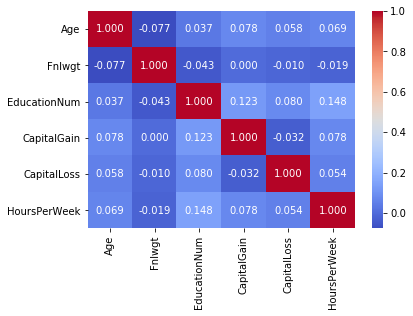

In [3]:
# Exploratory Data Analysis
cor_mat = data_train.corr()
sns.heatmap(cor_mat, annot=True, fmt='.3f', cmap='coolwarm')


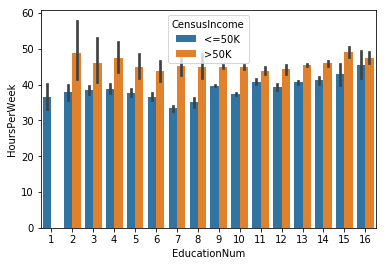

In [4]:
sns.barplot(x='EducationNum', y='HoursPerWeek', hue='CensusIncome', data=data_train)


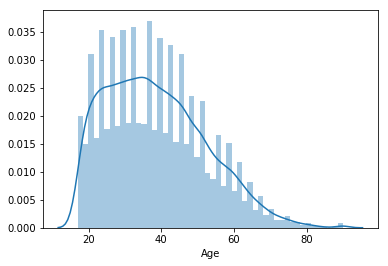

In [5]:
sns.distplot(data_train['Age'].dropna(), kde=True)

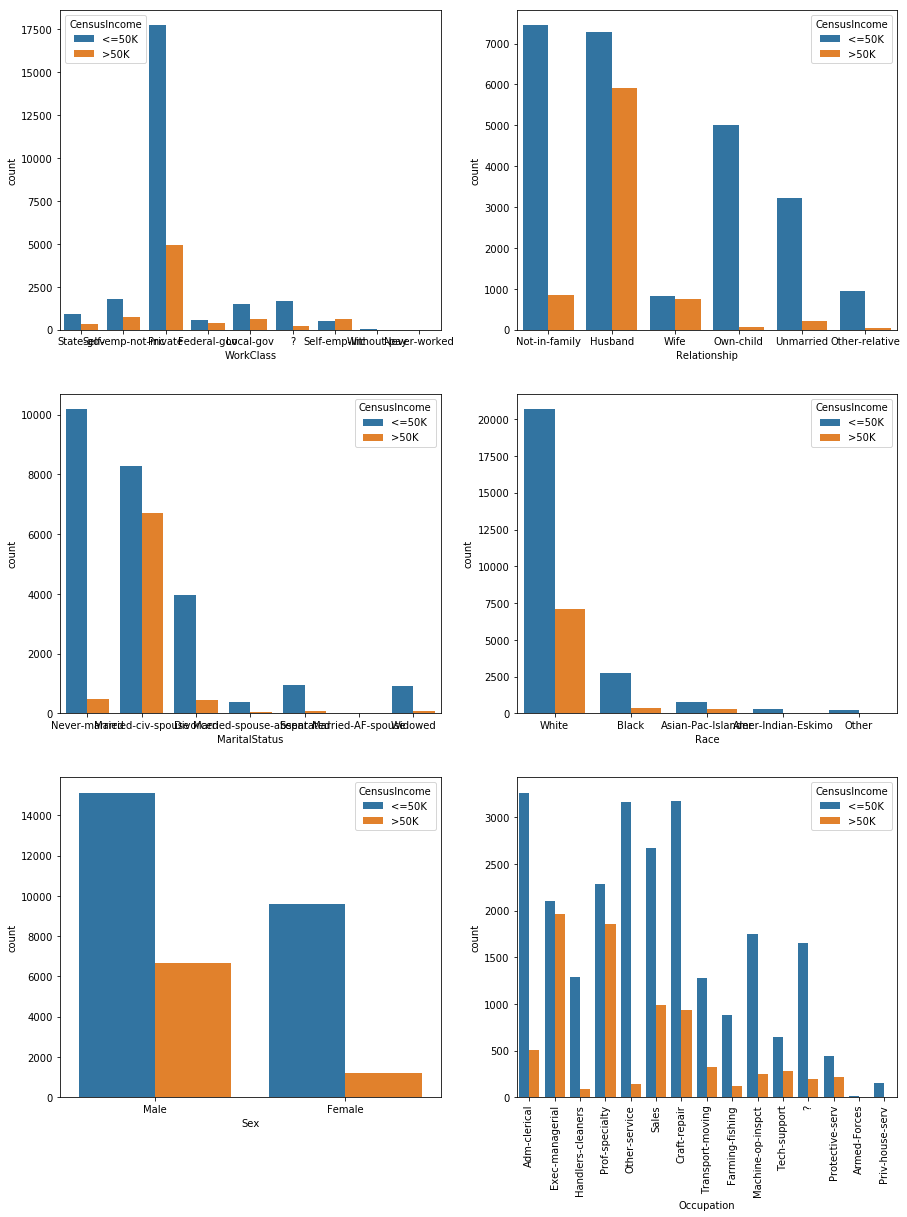

In [6]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))

sns.countplot(x='WorkClass', hue='CensusIncome',data = data_train, ax=a)
sns.countplot(x='Relationship', hue='CensusIncome', data = data_train, ax=b)
sns.countplot(x='MaritalStatus', hue='CensusIncome', data = data_train, ax=c)
sns.countplot(x='Race', hue='CensusIncome', data = data_train, ax=d)
sns.countplot(x='Sex', hue='CensusIncome', data = data_train, ax=e)
sns.countplot(x='Occupation', hue='CensusIncome', data = data_train, ax=f)
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

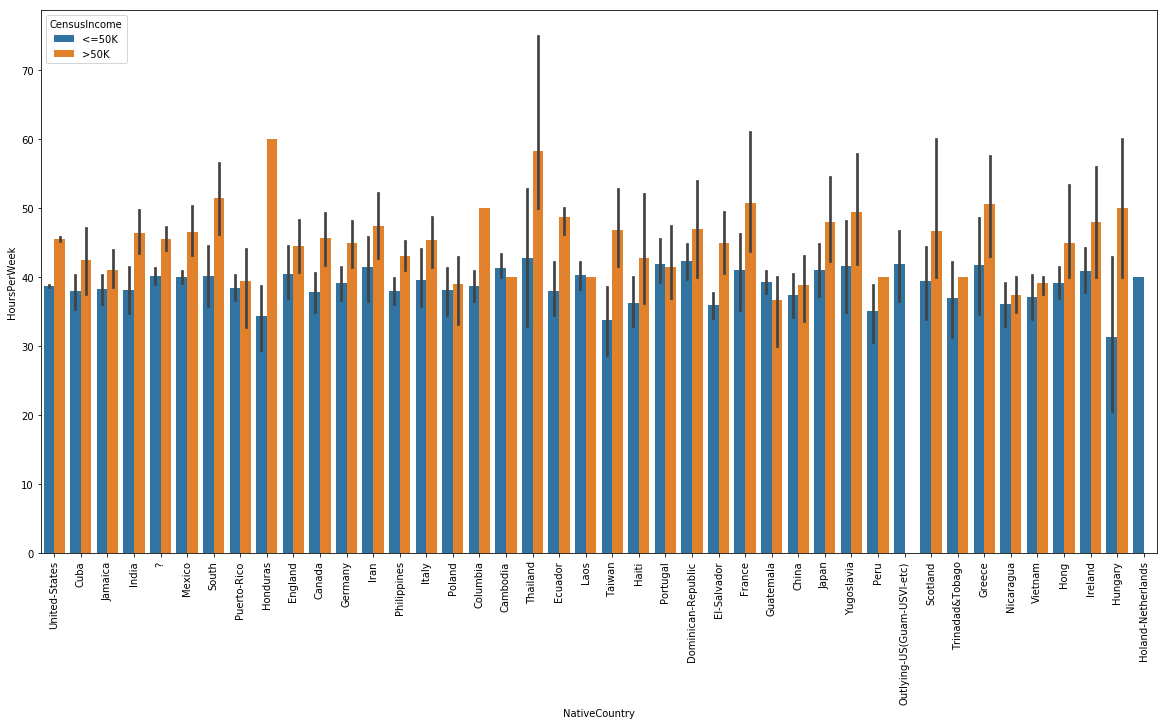

In [7]:
f,ax = plt.subplots(figsize=(20,10))
sns.barplot(x='NativeCountry', y='HoursPerWeek', hue='CensusIncome', data=data_train)
plt.xticks(rotation=90)

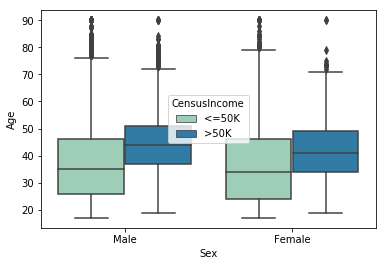

In [8]:
sns.boxplot(x='Sex', y='Age', hue="CensusIncome", data=data_train, palette="YlGnBu")

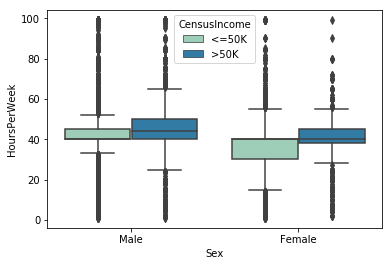

In [9]:
sns.boxplot(x='Sex', y='HoursPerWeek', hue="CensusIncome", data=data_train, palette="YlGnBu")

In [20]:
# We can drop column Education because it the same meaning with EducationNum.
data_train.drop(['Education'], axis=1, inplace=True)
data_test.drop(['Education'], axis=1, inplace=True)

In [21]:
# Preprocessing label encoder
labelEncoder = LabelEncoder()
data_train.dropna()
data_train = data_train.apply(labelEncoder.fit_transform)

data_test.dropna()
data_test = data_test.apply(labelEncoder.fit_transform)


In [22]:
# Prepare data for trainning state
train_arr = data_train.values
X = train_arr[:, 0:13]
Y = train_arr[:, 13]


validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [23]:
# Prepare data for testing state
test_arr = data_test.values
X_test = test_arr[:, 0:13]
Y_test = test_arr[:, 13]

In [14]:
# Create function apply training model
#TODO
def applyTrainningModelWithKFold(model, results, seed):
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold) #scoring='accuracy'
    print(cv_results)
    results.append(cv_results)
    
def applyGridSearchCV(model,X_train, Y_train, results, seed, params):
    kfold = KFold(n_splits=5, random_state=seed)
    gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=kfold)
    result = gridSearch.fit(X_train, Y_train)
    print(result.best_params_)
    results.append(cv_results)



In [15]:
###### Test apply KFold
# results = []
# svm=SVC()
# applyTrainningModelWithKFold(svm, results, seed)

####################GridSearch##########
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# applyGridSearchCV(svm, X_train, Y_train, results, seed, tuned_parameters)

In [16]:
# Trainning model using SVM
# kernel='linear'
svc=SVC(gamma='scale')
result = svc.fit(X_train,Y_train)

print(result)

Y_predict=svc.predict(X_validation)
print('Accuracy:')
print(metrics.accuracy_score(Y_validation, Y_predict))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy:
0.7601719637647781


In [17]:
########## Validation curve (complexity curve) ############
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(svc, X_train, Y_train, param_name='gamma', param_range=param_range, cv=5,
                                             scoring='accuracy', n_jobs=1)
print(train_scores)
print(test_scores)


KeyboardInterrupt: 

In [ ]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(param_range, test_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(param_range, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

In [ ]:
# Validation curve ---- v2
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [25]:
# Trainning model using LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_validation)
lr.score(X_validation, Y_validation)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.805926608321818

In [26]:
####### Validation curve ########
param_range = [0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(lr, X_train, Y_train, param_name='C', param_range=param_range, cv=5,
                                             scoring='f1', n_jobs=-1)
print(train_scores)
print(test_scores)

[[0.49019608 0.49047923 0.4904127  0.4801961  0.49031768]
 [0.47711656 0.50100604 0.48783611 0.48318357 0.49369642]
 [0.49378646 0.48929899 0.489093   0.4820671  0.49350977]
 [0.49352628 0.50006292 0.48118176 0.47532231 0.49352608]
 [0.47658797 0.49324841 0.48764246 0.48344881 0.48441674]]
[[0.47530864 0.47719298 0.50788955 0.46794872 0.50883392]
 [0.4616188  0.48866995 0.50397614 0.47046301 0.51333669]
 [0.47741273 0.47887324 0.50840752 0.46939862 0.51333669]
 [0.47487179 0.48792509 0.50174913 0.45988153 0.5110664 ]
 [0.45991561 0.47923962 0.50447761 0.4712766  0.5050813 ]]


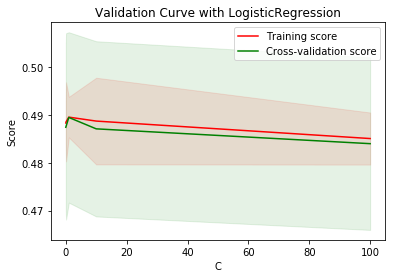

In [28]:
# Validation curve ---- v2
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with LogisticRegression")
plt.xlabel("C")
plt.ylabel("Score")
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.show()

In [ ]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(param_range, test_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(param_range, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

In [ ]:
# Trainning model using KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_train)
print('Accuracy:')
print(metrics.accuracy_score(Y_train,Y_predict))

In [ ]:
# Trainning model using DecisionTree
dt = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)
dt.fit(X_train, Y_train)

Y_predict = dt.predict(X_train)
print('Accuracy:')
print(metrics.accuracy_score(Y_train, Y_predict))

In [ ]:
###### Test apply KFold - DecisionTree
results = []
dt = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)
applyTrainningModelWithKFold(dt, results, seed)

In [ ]:
# Ensembles
rf = RandomForestClassifier(min_samples_leaf=2)
rf.fit(X_train, Y_train)

Y_predict = rf.predict(X_validation)
print(metrics.accuracy_score(Y_validation, Y_predict))